In [57]:
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf # high-level stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import pandas as pd
%matplotlib inline

In [121]:
#make toy dataset with error
def loadDatasetLinear(row=1000,error = 0.1):
    b0 = 1
    b1 = 2
    X = np.random.rand(row,1)
    Xe = error*np.random.rand(row,1)
    Y = b0 +b1*X + Xe
    return (X,Y)

In [122]:
#make advanced dataset
def loadDatasetVarLn(row=1000,error = 0.1):
    b0 = 1
    b1 = np.array([[1],[1],[1]])
    X = np.random.rand(row,3)
    Xe = error*np.random.rand(row,1)
    Y = b0 +np.dot(X,b1) + Xe
    return (X,Y)

In [123]:
#make non-linear dataset
def loadDatasetNonlnMp(row=1000,error=0.001):
    b0 = 1
    b1 = 2
    X1 = np.random.rand(row,1)
    X2 = np.random.rand(row,1)
    X = np.hstack((X1,X2))
    Xe = error*np.random.rand(row,1)
    Y = b0 +b1*X1*X2 + Xe
    return (X,Y)

In [125]:
X,Y = loadDatasetLinear()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_val,Y_val = loadDatasetLinear(row=10)
print(X_val,Y_val)

[[0.52172235]
 [0.39578733]
 [0.04971722]
 [0.09511382]
 [0.68405716]
 [0.69752764]
 [0.89663999]
 [0.76942854]
 [0.10167589]
 [0.69492147]] [[2.12859416]
 [1.79907151]
 [1.1517084 ]
 [1.21107803]
 [2.46042127]
 [2.42369095]
 [2.84287741]
 [2.62452235]
 [1.26061154]
 [2.42026892]]


In [98]:
def OLSregression(X_train,y_train,X_test,y_test):
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    model = sm.OLS(y_train,X_train)
    results = model.fit()
    print(results.summary())
    y_pred = results.fittedvalues
    pear = scipy.stats.pearsonr(y_train[:,0], y_pred)
    print('Pearson\'s r is {:6f}'.format(pear[0]))
    mse = np.mean((y_train[:,0] - y_pred)**2)
    print('MSE is {:6f}'.format(mse))
    print('MSE is {:6f}'.format(results.mse_resid))
    df = pd.DataFrame({'X_Axis': X_train[:, 1], 'y_train': y_train[:,0], 'y_pred':y_pred})
    df = df.melt('X_Axis', var_name='cols',  value_name='vals')
    plt.figure(figsize=(16, 10))
    sns.scatterplot(x="X_Axis", y="vals", hue='cols', data=df)
    
    

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.105e+05
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:29:46   Log-Likelihood:                 1697.9
No. Observations:                 800   AIC:                            -3392.
Df Residuals:                     798   BIC:                            -3382.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0505      0.002    494.940      0.0

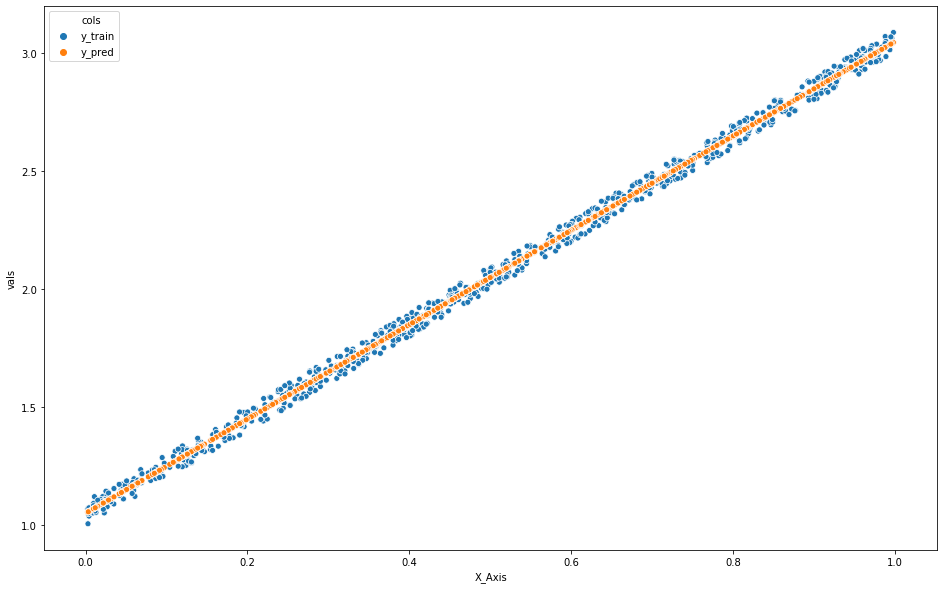

In [99]:
OLSregression(X_train,y_train,X_test,y_test)

In [100]:
def GLMregression(X_train,y_train,X_test,y_test,family='Poisson'):
    if family == 'Poisson':
        X_train = sm.add_constant(X_train)
        model = sm.GLM(y_train, X_train, family=sm.families.Poisson())
        results = model.fit()
        print(results.summary())
        y_pred = results.mu
        pear = scipy.stats.pearsonr(y_train[:,0], y_pred)
        print('Pearson\'s r is {:6f}'.format(pear[0]))
        
        mse = np.mean((y_train[:,0] - y_pred)**2)
        print('MSE is {:6f}'.format(mse))
        
        
        df = pd.DataFrame({'X_Axis': X_train[:, 1], 'y_train': y_train[:,0], 'y_pred':y_pred})
        df = df.melt('X_Axis', var_name='cols',  value_name='vals')
        plt.figure(figsize=(16, 10))
        sns.scatterplot(x="X_Axis", y="vals", hue='cols', data=df)
        return 1
    else:
        return -1

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  800
Model:                            GLM   Df Residuals:                      798
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1048.5
Date:                Tue, 03 Dec 2019   Deviance:                       2.5715
Time:                        16:30:00   Pearson chi2:                     2.54
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1889      0.058      3.258      0.0

1

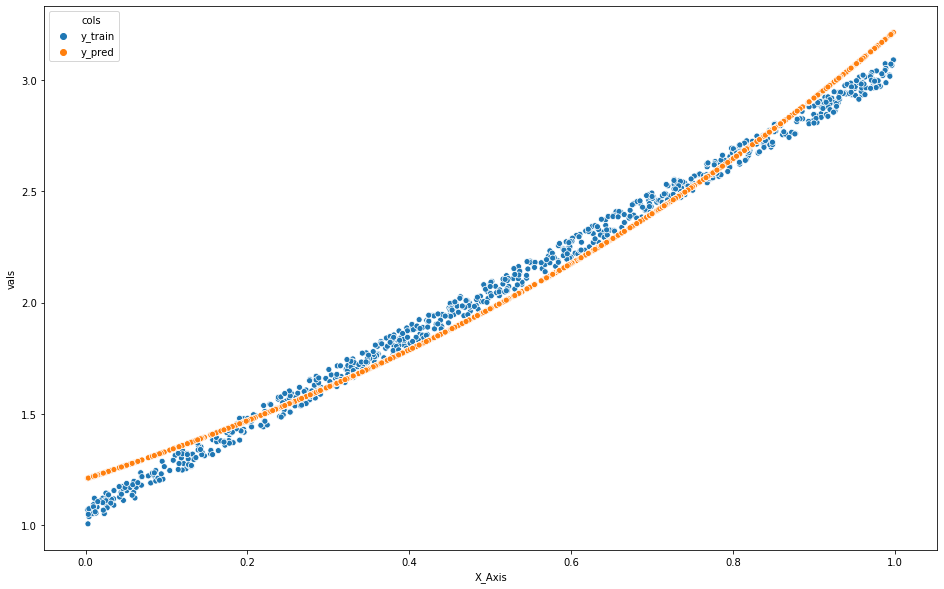

In [101]:
GLMregression(X_train,y_train,X_test,y_test)

(1000, 1)

(1000, 1)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [4]:
X_train.shape

(800, 1)

In [5]:
#activation functions and their gradient functions
def sigmoid(X):
    return 1/(1+np.exp(-X))

def sigmoid_grad(X):
    return sigmoid(X) * (1 - sigmoid(X))

def tanh(z):
    return np.tanh(z)

def tanh_grad(z):
     return 1 - np.tanh(z) ** 2

def ReLU(z):
    return np.clip(z, 0, np.inf)

def ReLU_grad(z):
    return (z > 0).astype(int)

def affine(X,slope=1,intercept=0):
     return slope * X + intercept
    
def affine_grad(X,slope=1,intercept=0):
    return slope * np.ones_like(X)

In [104]:
#define neural network model
class NeuralNetwork:
    def __init__(self, input_dim, output_dim=1,hidden_dim = 4,lr=0.005):
        #init weights
        self.weights1   = np.random.rand(input_dim+1,hidden_dim) 
        self.weights2   = np.random.rand(hidden_dim,output_dim)                 
        #set learning rate
        self.lr         = lr
      
    def print_w(self):
        '''print weight to inspect the current values of network'''  
        print('print_weights ------------>')
        print(self.weights1)
        print(self.weights2)
        
    def feedforward(self,X):
        X = np.hstack((X,np.ones((X.shape[0],1))))
        self.layer1 = affine(np.dot(X, self.weights1))
        self.output = affine(np.dot(self.layer1, self.weights2))
        return self.output
    def backprop(self,X, Y):
        X = np.hstack((X,np.ones((X.shape[0],1))))
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(Y - self.output) * affine_grad(np.dot(self.layer1, self.weights2))))
        d_weights1 = np.dot(X.T,  \
                            (np.dot(2*(Y - self.output) * affine_grad(np.dot(self.layer1, self.weights2)), self.weights2.T)\
                             * affine_grad(np.dot(X, self.weights1))))

        # update the weights with the derivative (slope) of the loss function multiply learning rate
        self.weights1 += d_weights1*self.lr
        self.weights2 += d_weights2*self.lr
    
    def test(self,X):
        '''get predicted values for any input data'''
        X = np.hstack((X,np.ones((X.shape[0],1))))
        hidden_layer1 = affine(np.dot(X, self.weights1))
        return affine(np.dot(hidden_layer1, self.weights2))
        
    def train(self,X,Y,num_train_iterations):
        '''train model with X and Y for num_train_iterations times'''
        #print('training  ---------------->')
        for iteration in range(num_train_iterations): 
            self.feedforward(X) 
            self.backprop(X,Y)
            #print interim MSE
#             if iteration % 100 == 0:
#                 mse = np.mean((self.output - Y)**2)
#                 print("Epoch ", iteration, "MSE: ", mse)
                

In [109]:
def NNregression(X_train, X_test, y_train, y_test):
    batch_size = 4
    #initialize network with fixed output dim of 1
    neural_network = NeuralNetwork(X_train.shape[1],1,lr=1e-3)

    for index in range(0,X_train.shape[0],batch_size):

        #get batch X and Y
        batch_X=X_train[index:min(index+batch_size,X_train.shape[0]),:]
        batch_Y=y_train[index:min(index+batch_size,y_train.shape[0])]

        #train model with batch
        neural_network.train(batch_X,batch_Y,500)
    y_pred = neural_network.feedforward(X_train)[:,0]
    pear = scipy.stats.pearsonr(y_train[:,0], y_pred)
    print('Pearson\'s r is {:6f}'.format(pear[0]))

    mse = np.mean((y_train[:,0] - y_pred)**2)
    print('MSE is {:6f}'.format(mse))


    df = pd.DataFrame({'X_Axis': X_train[:, 1], 'y_train': y_train[:,0], 'y_pred':y_pred})
    df = df.melt('X_Axis', var_name='cols',  value_name='vals')
    plt.figure(figsize=(16, 10))
    sns.scatterplot(x="X_Axis", y="vals", hue='cols', data=df)


(800,)
Pearson's r is 0.998717
MSE is 0.000925


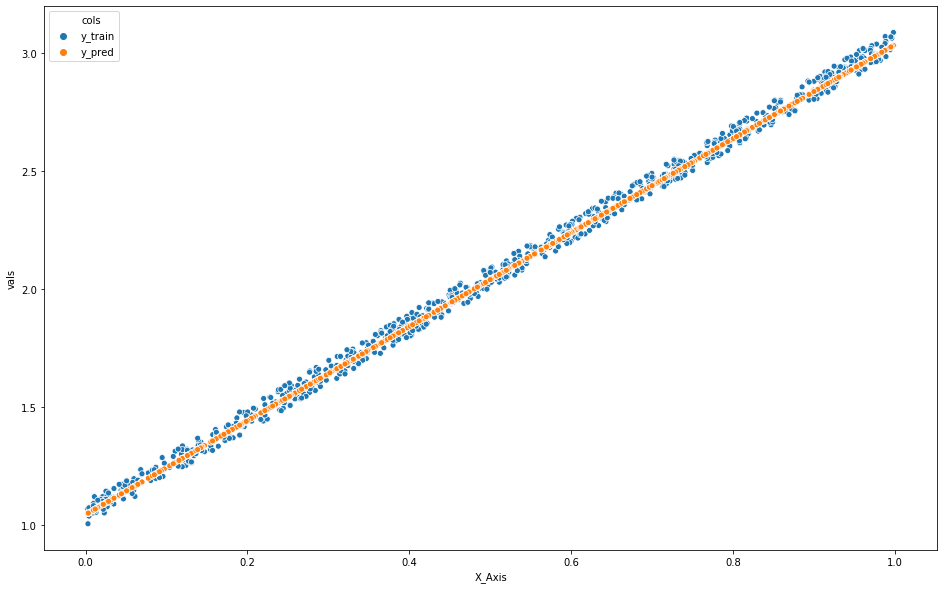

In [110]:
NNregression(X_train, X_test, y_train, y_test)

In [7]:
#prototyping code

batch_size = 4

#initialize network with fixed output dim of 1
neural_network = NeuralNetwork(X_train.shape[1],1,lr=1e-3)

for index in range(0,X_train.shape[0],batch_size):
    
    
    #get batch X and Y
    batch_X=X_train[index:min(index+batch_size,X_train.shape[0]),:]
    batch_Y=y_train[index:min(index+batch_size,y_train.shape[0])]
    
    #train model with batch
    neural_network.train(batch_X,batch_Y,500)
    
    #print final state of weights
    neural_network.print_w()

    # Test the neural network with new test data. 
    #get predicted y
    y_pred = neural_network.test(X_test)
    #compare predicted y and groundtruth 
#     print('predicted data ----------->')
#     print(y_pred)
#     print('real data ---------------->')
#     print(y_test)
    #calculate MSE
    mse = np.mean((y_test - y_pred)**2)
    print('MSE on test data --------->')
    print(mse)

training  ---------------->
Epoch  0 MSE:  0.16364743414196084
Epoch  100 MSE:  0.028295327714840047
Epoch  200 MSE:  0.02340038870460382
Epoch  300 MSE:  0.019341308176139767
Epoch  400 MSE:  0.015895382351820503
print_weights ------------>
[[0.96411069 0.4920044  0.47460468 0.48890444]
 [0.81100835 0.64401084 0.03506831 0.6125065 ]]
[[0.68088671]
 [0.76407792]
 [0.93403184]
 [0.09108351]]
MSE on test data --------->
0.028180830737644092
training  ---------------->
Epoch  0 MSE:  0.039033153811276575
Epoch  100 MSE:  0.017446373100805754
Epoch  200 MSE:  0.010615653127570466
Epoch  300 MSE:  0.006353597986783832
Epoch  400 MSE:  0.003750291763989511
print_weights ------------>
[[ 1.04984623  0.58481061  0.5893285   0.50146422]
 [ 0.75960182  0.58890247 -0.03346126  0.6049007 ]]
[[0.74533979]
 [0.7847176 ]
 [0.99715929]
 [0.10714929]]
MSE on test data --------->
0.0010580110207680591
training  ---------------->
Epoch  0 MSE:  0.0014573766960355153
Epoch  100 MSE:  0.000611407871659125


In [8]:
#manual validation 
X_val = np.array([[1],
        [2],
        [3],
        [4],
        [1]])
y_val_pred = neural_network.test(X_val)
y_val_pred

array([[3.00058014],
       [5.00053713],
       [7.00049413],
       [9.00045113],
       [3.00058014]])

compare Rsquare/ MSE predict(OLS/NN)/known/